# PART 4
---

In [124]:
!pip install scikit-learn

In [1]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [2]:
df = pd.read_csv('bioactivity_data_pIC50_after_PaDEL_descriptors.csv')

In [3]:
X = df.drop('pIC50', axis=1)
X

,PubchemFP0,PubchemFP1,PubchemFP2,PubchemFP3,PubchemFP4,PubchemFP5,PubchemFP6,PubchemFP7,PubchemFP8,PubchemFP9,...,PubchemFP871,PubchemFP872,PubchemFP873,PubchemFP874,PubchemFP875,PubchemFP876,PubchemFP877,PubchemFP878,PubchemFP879,PubchemFP880
0,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1468,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1469,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1470,1,1,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1471,1,1,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [15]:
X.to_csv('descriptor_list.csv', index=False)

In [4]:
Y = df.pIC50
Y

0       5.148736
1       4.301029
2       5.267598
3       5.180449
4       4.292429
          ...   
1468    4.999996
1469    5.721224
1470    5.999957
1471    5.999957
1472    4.999996
Name: pIC50, Length: 1473, dtype: float64

In [91]:
X.shape

(1473, 881)

In [92]:
Y.shape

(1473,)

Reducir la dimensionalidad del conjunto de datos y eliminar características que no aportan mucha información debido a su falta de variabilidad.

In [109]:
from sklearn.feature_selection import VarianceThreshold
selection = VarianceThreshold(threshold=(.8*(1-.8)))
X = selection.fit_transform(X)

In [110]:
X.shape

(1473, 154)

In [5]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2)

In [6]:
X_train.shape, Y_train.shape

((1178, 881), (1178,))

In [7]:
X_test.shape, Y_test.shape

((295, 881), (295,))

### Crear el modelo de regresión (Random Forest)

In [8]:
model = RandomForestRegressor(n_estimators=1000)
model.fit(X_train, Y_train)
r2 = model.score(X_test, Y_test)
r2

0.016060423614377872

In [9]:
Y_pred = model.predict(X_test)

In [10]:
Y_pred

array([4.31333815, 5.00647161, 4.17536888, 5.21318195, 5.06577019,
       4.87189314, 4.97193418, 4.87189314, 4.82864759, 5.24029949,
       4.78475775, 5.44886398, 4.87327281, 5.50672766, 5.40471159,
       4.81203085, 5.74509321, 5.25795151, 3.65874541, 5.3918539 ,
       4.87189314, 4.88299905, 5.59728345, 4.46747441, 5.4463738 ,
       5.4534615 , 5.01853873, 5.26882364, 4.77040074, 5.64817162,
       5.30089087, 4.76252257, 5.38049382, 5.26882364, 5.1591866 ,
       5.30979089, 5.41653776, 5.01323752, 4.22631972, 4.87189314,
       5.59653387, 4.82831859, 5.50055987, 4.46747441, 5.02451041,
       4.30332836, 4.60184779, 3.95812154, 5.48362904, 5.4543084 ,
       5.13346838, 4.3022007 , 5.19878213, 5.79799659, 4.6108492 ,
       5.32412056, 4.16459159, 5.42615823, 5.04889458, 4.3102201 ,
       4.84541423, 5.60901695, 4.30755933, 3.94458315, 4.81272178,
       4.66124446, 4.94107736, 4.83332704, 5.73133125, 5.58444699,
       5.70369209, 3.95522288, 4.63652258, 5.48854864, 4.99324

### Scatter Plot Experimental vs valores pIC50 

<function matplotlib.pyplot.show(close=None, block=None)>

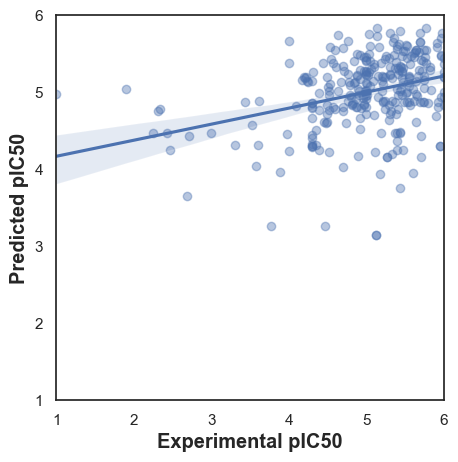

In [11]:
import matplotlib.pyplot as plt

sns.set(color_codes = True)
sns.set_style("white")

ax = sns.regplot(x=Y_test, y=Y_pred, scatter_kws={'alpha':0.4})
ax.set_xlabel('Experimental pIC50', fontsize='large', fontweight='bold')
ax.set_ylabel('Predicted pIC50', fontsize='large', fontweight='bold')
ax.set_xlim(1,6)
ax.set_ylim(1,6)
ax.figure.set_size_inches(5,5)

plt.show

In [125]:
!pip install -U scikit-learn joblib

  Obtaining dependency information for scikit-learn from https://files.pythonhosted.org/packages/18/ff/919087b9aa5318c3992def31b74e019eee39c57ff6bf140289041df3db86/scikit_learn-1.4.1.post1-cp311-cp311-macosx_12_0_arm64.whl.metadata
  Using cached scikit_learn-1.4.1.post1-cp311-cp311-macosx_12_0_arm64.whl.metadata (11 kB)
Using cached scikit_learn-1.4.1.post1-cp311-cp311-macosx_12_0_arm64.whl (10.4 MB)
  Attempting uninstall: scikit-learn
    Found existing installation: scikit-learn 1.3.2
    Uninstalling scikit-learn-1.3.2:
      Successfully uninstalled scikit-learn-1.3.2


In [13]:
import joblib

In [14]:
joblib.dump(model, 'rfm.pkl')

['rfm.pkl']

In [128]:
!ls

CDD P1.ipynb
CDD P2.ipynb
CDD P3.ipynb
CDD P4.ipynb
PaDEL-Descriptor
Readme.md
__MACOSX
bioactivity_data.csv
bioactivity_data_pIC50.csv
bioactivity_data_pIC50_after_PaDEL_descriptors.csv
bioactivity_preprocessed_data.csv
descriptors_output.csv
mannwhitneyu_LogP.csv
mannwhitneyu_MW.csv
mannwhitneyu_NumHAcceptors.csv
mannwhitneyu_NumHDonors.csv
mannwhitneyu_pIC50.csv
model.ipynb
model.py
molecule.smi
padel.sh
padel.zip
plot_LogP.pdf
plot_MW.pdf
plot_MW_vs_LogP.pdf
plot_NumHAcceptors.pdf
plot_NumHDonors.pdf
plot_bioactivity_class.pdf
plot_ic50.pdf
random_forest_model.pkl
results.zip
rfm.pkl
test.txt
